<a href="https://colab.research.google.com/github/bartiralira/public/blob/main/visao_computacional_rotacao_imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/michelpf/fiap-ml-visao-computacional

Cloning into 'fiap-ml-visao-computacional'...
remote: Enumerating objects: 11545, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 11545 (delta 48), reused 72 (delta 24), pack-reused 11432
Receiving objects: 100% (11545/11545), 983.86 MiB | 28.86 MiB/s, done.
Resolving deltas: 100% (499/499), done.
Checking out files: 100% (10576/10576), done.


In [87]:
%cd fiap-ml-visao-computacional/aula-2-transformacao/

[Errno 2] No such file or directory: 'fiap-ml-visao-computacional/aula-2-transformacao/'
/content/fiap-ml-visao-computacional/aula-2-transformacao


In [154]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

#Exibição na mesma tela do Jupyter
%matplotlib inline

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})


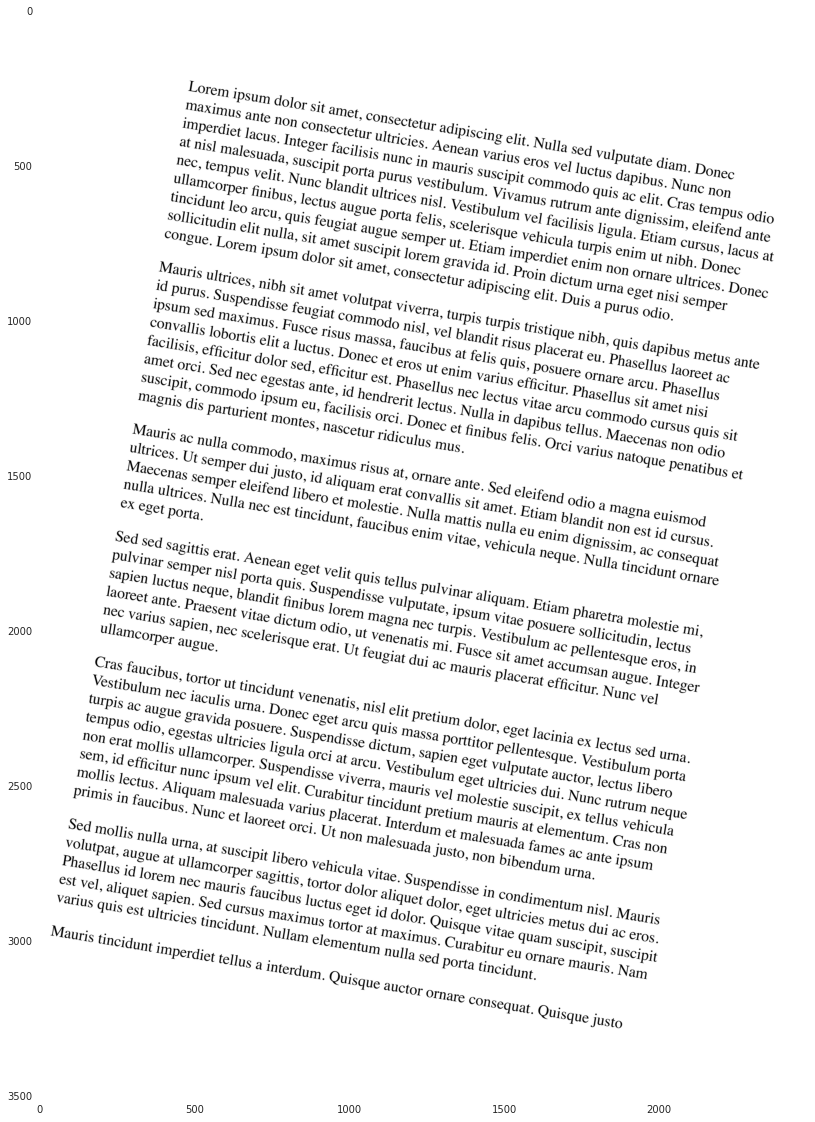

In [6]:
imagem = cv2.imread("imagens/documento.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,20))
plt.imshow(imagem)
#plt.title("Documento")

In [7]:
imagem.shape

(3509, 2480, 3)

In [68]:
comp, alt = imagem.shape[:2]

In [70]:
comp, alt

(3509, 2480)

In [71]:
matriz_r = cv2.getRotationMatrix2D((50, 3000),9,1)
matriz_r

array([[ 9.87688341e-01,  1.56434465e-01, -4.68687812e+02],
       [-1.56434465e-01,  9.87688341e-01,  4.47567015e+01]])

In [75]:
imagem_r = cv2.warpAffine(imagem,matriz_r,(alt ,comp),borderValue=(255,255,255) )

In [76]:
imagem_r = cv2.line(imagem_r,(0,1000),(2000,1000),(255,0,0),2)

Text(0.5, 1.0, 'Robô Rotacionado')

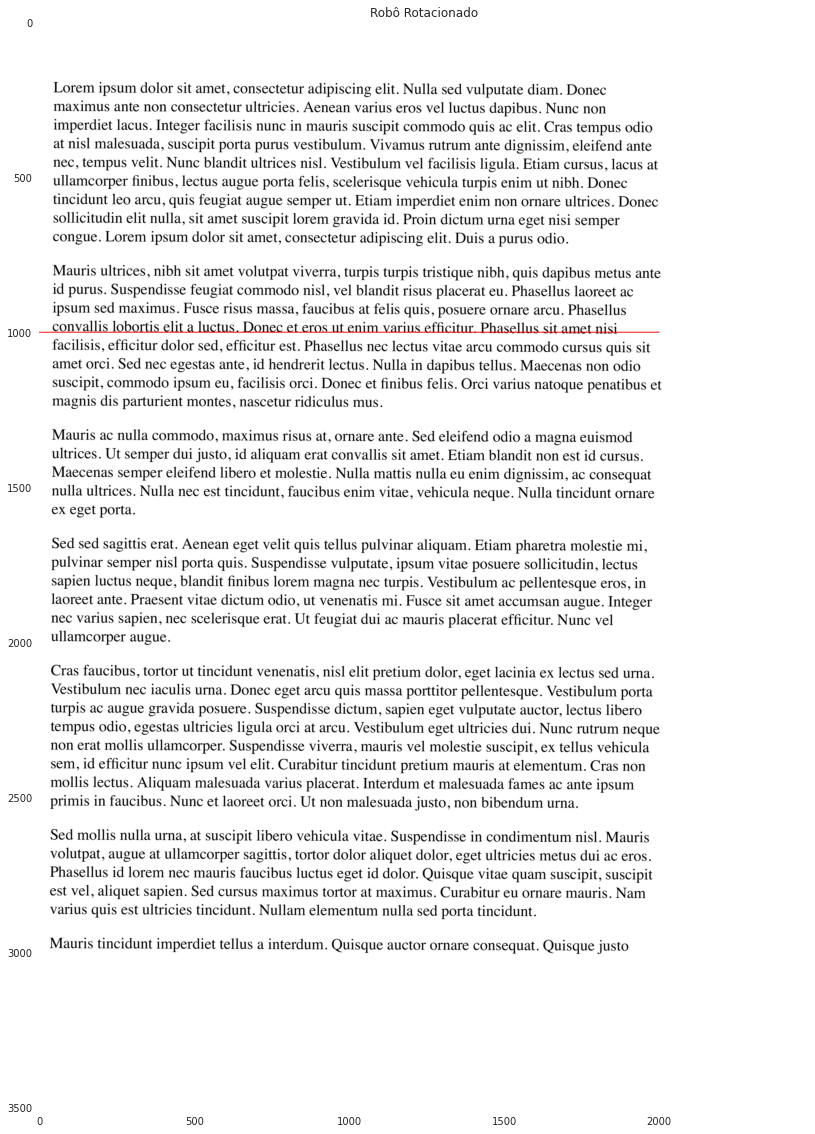

In [77]:
plt.figure(figsize=(30,20))
plt.imshow(imagem_r)
plt.title("Robô Rotacionado")

In [66]:
matriz_t = np.float32([[1,0,200],[0,1,0]])
matriz_t

array([[  1.,   0., 200.],
       [  0.,   1.,   0.]], dtype=float32)

In [67]:
imagem_t = cv2.warpAffine(imagem_r,matriz_t,(comp, alt))

 Usando os interpoladores

In [89]:
%cd fiap-ml-visao-computacional/aula-2-transformacao/
imagem2 = cv2.imread("imagens/coffee_small.jpg")
imagem2 = cv2.cvtColor(imagem2,cv2.COLOR_BGR2RGB)

[Errno 2] No such file or directory: 'fiap-ml-visao-computacional/aula-2-transformacao/'
/content/fiap-ml-visao-computacional/aula-2-transformacao


In [90]:
imagem2.shape

(67, 100, 3)

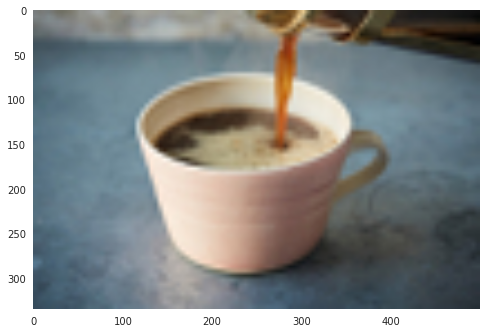

In [91]:
fator_x, fator_y = 5,5
imagem2_linear = cv2.resize(imagem2,None, fx=fator_x, fy=fator_y)
plt.imshow(imagem2_linear)

In [92]:
imagem2_linear.shape

(335, 500, 3)

In [95]:
imagem_nearest = cv2.resize(imagem2,None,fx=fator_x, fy=fator_y, interpolation = cv2.INTER_NEAREST)

In [96]:
imagem_nearest.shape

(335, 500, 3)

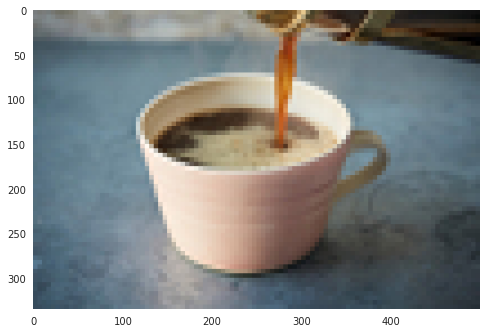

In [97]:
plt.imshow(imagem_nearest)

In [98]:
tamanho_padrao= (300,300)

In [99]:
imagem2_linear = cv2.resize(imagem2, tamanho_padrao)
imagem2_area = cv2.resize(imagem2, tamanho_padrao,interpolation = cv2.INTER_AREA)
imagem2_nearest = cv2.resize(imagem2, tamanho_padrao,interpolation = cv2.INTER_NEAREST)
imagem2_cubico = cv2.resize(imagem2, tamanho_padrao,interpolation = cv2.INTER_CUBIC)
imagem2_lanczo = cv2.resize(imagem2, tamanho_padrao,interpolation = cv2.INTER_LANCZOS4)

Text(0.5, 1.0, 'Ampliação Lanczo')

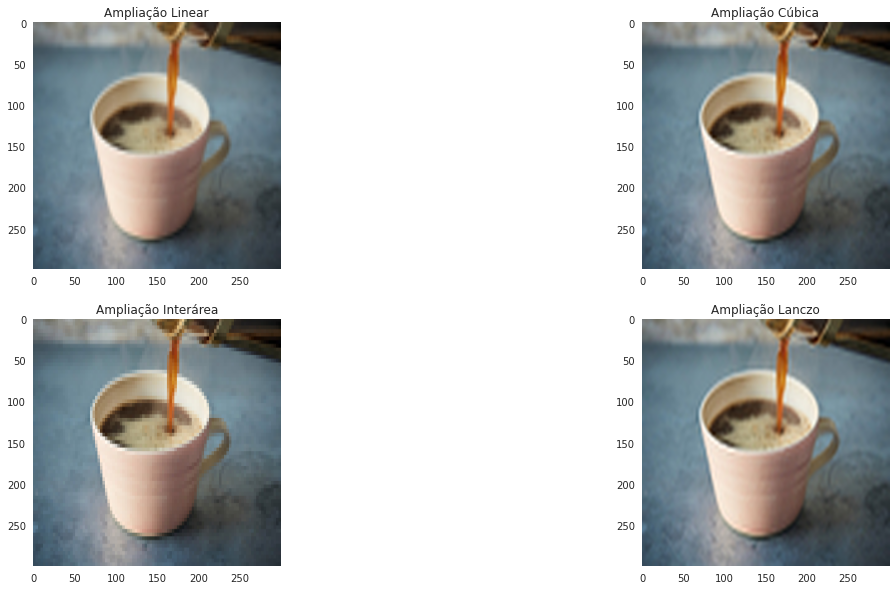

In [100]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(imagem2_linear)
plt.title("Ampliação Linear")

plt.subplot(2,2,2)
plt.imshow(imagem2_cubico)
plt.title("Ampliação Cúbica")

plt.subplot(2,2,3)
plt.imshow(imagem2_area)
plt.title("Ampliação Interárea")

plt.subplot(2,2,4)
plt.imshow(imagem2_lanczo)
plt.title("Ampliação Lanczo")

##Imagem cheque

[Errno 2] No such file or directory: 'fiap-ml-visao-computacional/aula-2-transformacao/'
/content/fiap-ml-visao-computacional/aula-2-transformacao


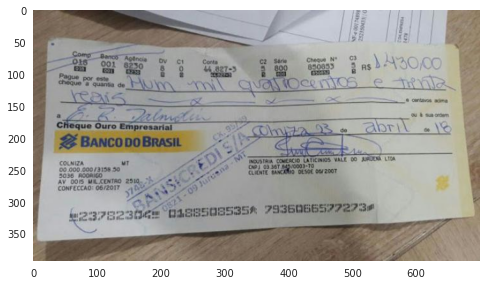

In [137]:
%cd fiap-ml-visao-computacional/aula-2-transformacao/
imagem3 = cv2.imread("imagens/cheque.jpg")
imagem3 = cv2.cvtColor(imagem3,cv2.COLOR_BGR2RGB)
plt.imshow(imagem3)

In [107]:
imagem3.shape

(393, 700, 3)

In [146]:
p1 = (30,50)
p2 = (660, 60)
p3 = (5, 360)
p4 = (685, 315)

In [147]:
imagem3_m = imagem3.copy()

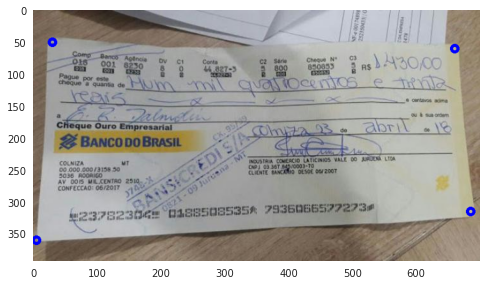

In [148]:
cv2.circle(imagem3_m, p1, 5, (0, 0, 255), 3)
cv2.circle(imagem3_m, p2, 5, (0, 0, 255), 3)
cv2.circle(imagem3_m, p3, 5, (0, 0, 255), 3)
cv2.circle(imagem3_m, p4, 5, (0, 0, 255), 3)
plt.imshow(imagem3_m)

In [149]:
tamanho_final = (700,300)

In [150]:
pontos_marcadores = np.float32([p1,p2,p3,p4])
pontos_destino = np.float32([[0,0],[tamanho_final[0],0],[0,tamanho_final[1]],tamanho_final])

Text(0.5, 1.0, 'Portal com Marcadores')

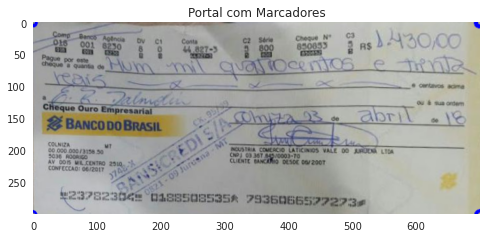

In [151]:
matriz_perspectiva = cv2.getPerspectiveTransform(pontos_marcadores, pontos_destino)
imagem_transformada = cv2.warpPerspective(imagem3_m, matriz_perspectiva, tamanho_final)

plt.imshow(imagem_transformada)
plt.title("Portal com Marcadores")

## Desafio 1

[Errno 2] No such file or directory: 'fiap-ml-visao-computacional/aula-2-transformacao/'
/content/fiap-ml-visao-computacional/aula-2-transformacao


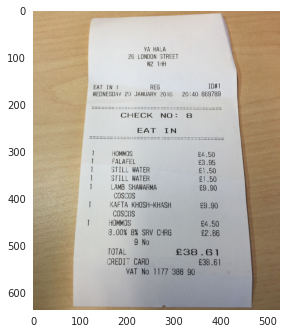

In [166]:
%cd fiap-ml-visao-computacional/aula-2-transformacao/
desafio_nf = cv2.imread("desafio-1/imagens/nota-fiscal.png")
desafio_nf = cv2.cvtColor(desafio_nf,cv2.COLOR_BGR2RGB)
plt.imshow(desafio_nf)

In [185]:
desafio_nf.shape

(637, 526, 3)

In [182]:
p1 = (120,15)
p2 = (410, 10)
p3 = (90, 630)
p4 = (460, 630)

In [183]:
desafio_nf_copy = desafio_nf.copy()

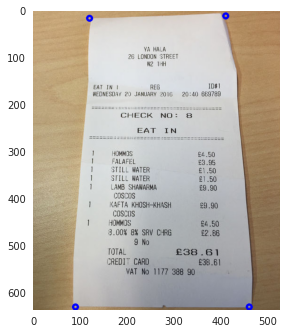

In [184]:
cv2.circle(desafio_nf_copy, p1, 5, (0, 0, 255), 3)
cv2.circle(desafio_nf_copy, p2, 5, (0, 0, 255), 3)
cv2.circle(desafio_nf_copy, p3, 5, (0, 0, 255), 3)
cv2.circle(desafio_nf_copy, p4, 5, (0, 0, 255), 3)
plt.imshow(desafio_nf_copy)

Text(0.5, 1.0, 'Portal com Marcadores')

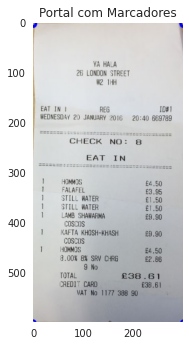

In [189]:
tamanho_final = (300,600)

pontos_marcadores = np.float32([p1,p2,p3,p4])
pontos_destino = np.float32([[0,0],[tamanho_final[0],0],[0,tamanho_final[1]],tamanho_final])


matriz_perspectiva = cv2.getPerspectiveTransform(pontos_marcadores, pontos_destino)
imagem_transformada = cv2.warpPerspective(desafio_nf_copy, matriz_perspectiva, tamanho_final)

plt.imshow(imagem_transformada)
plt.title("Portal com Marcadores")

## Recorte de imagem

[Errno 2] No such file or directory: 'fiap-ml-visao-computacional/aula-2-transformacao/'
/content/fiap-ml-visao-computacional/aula-2-transformacao


Text(0.5, 1.0, 'Imagem Original')

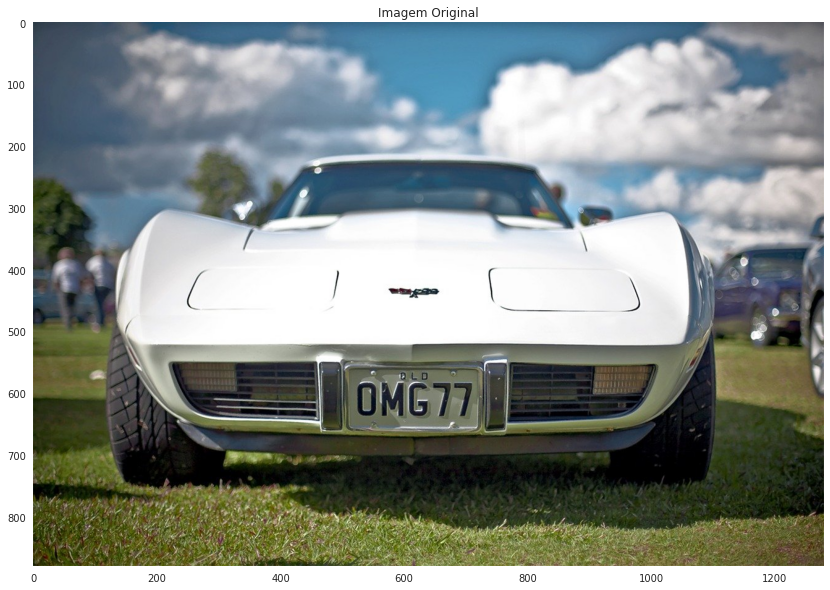

In [204]:
%cd fiap-ml-visao-computacional/aula-2-transformacao/
imagem_car = cv2.imread("imagens/car.jpg")
imagem_car = cv2.cvtColor(imagem_car, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem_car)
plt.title("Imagem Original")

In [211]:
y_inicial, x_inicial = 550, 500
y_final, x_final =  670, 730

roi = imagem_car[y_inicial:y_final , x_inicial: x_final]

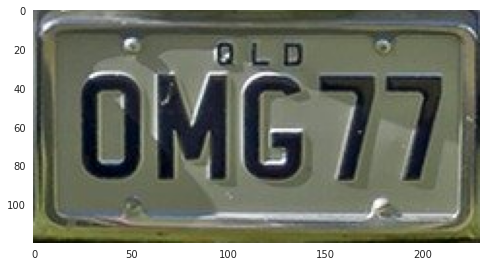

In [212]:
plt.imshow(roi)

In [213]:
roi.shape

(120, 230, 3)

In [214]:
roi_bgr = cv2.cvtColor(roi,cv2.COLOR_RGB2BGR)
cv2.imwrite("placa_carro.png",roi)

True

## deliminatodores

[Errno 2] No such file or directory: 'fiap-ml-visao-computacional/aula-2-transformacao/'
/content/fiap-ml-visao-computacional/aula-2-transformacao


Text(0.5, 1.0, 'Imagem Original')

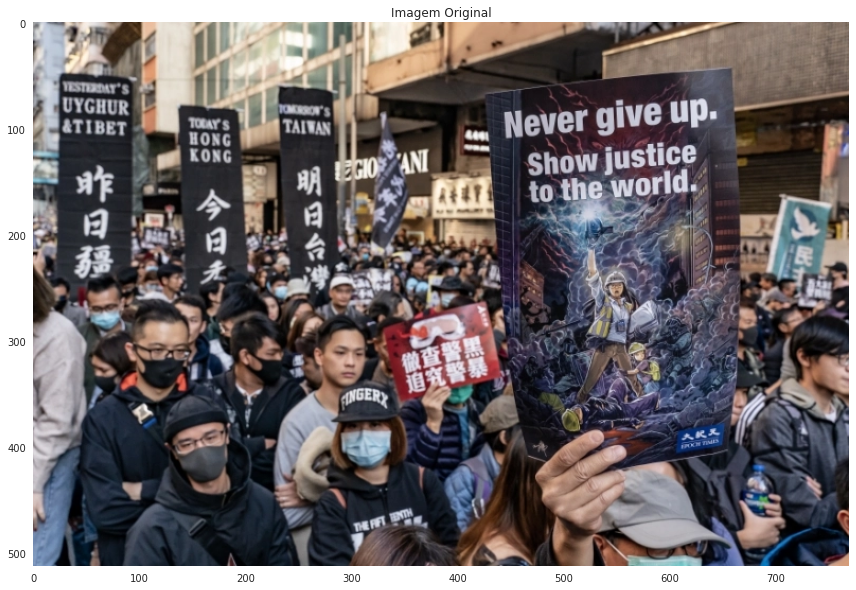

In [216]:
%cd fiap-ml-visao-computacional/aula-2-transformacao/
imagem_protesto = cv2.imread("imagens/protesters.png")
imagem_protesto = cv2.cvtColor(imagem_protesto, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem_protesto)
plt.title("Imagem Original")

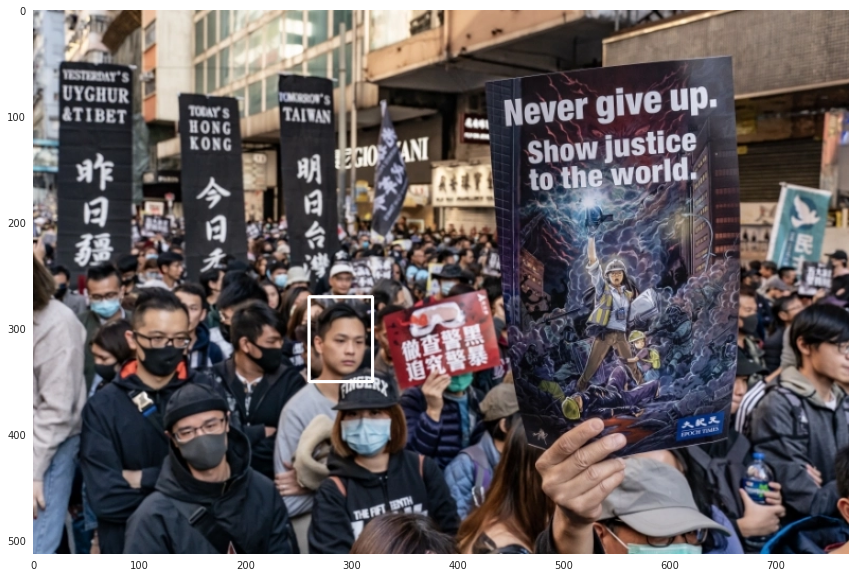

In [238]:
x_inicial, y_inicial = 260, 270
x_final, y_final =  320, 350


imagem_a = imagem_protesto.copy()
cv2.rectangle(imagem_a,(x_inicial,y_inicial) , (x_final, y_final), (255,255,255),2)


plt.figure(figsize=(20,10))
plt.imshow(imagem_a)

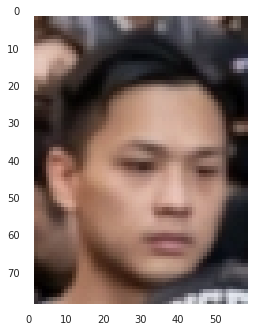

In [241]:
roi = imagem_a[y_inicial: y_final, x_inicial:x_final]

plt.imshow(roi)